In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Models.DeBruijn.Graph import Graph
from Models.Decoder import Decoder
from Models.Encoder import Encoder
from utils.converter import str2ncs, ncs2str
from utils.mutant import errors_add
from Models.Decoder.Decoder import DFS, BFS, Beam, Path
import time
import numpy as np
import math
import sklearn


In [39]:
testp = Path(vertexes=['test'], weight=2)
testcp = testp.copy()
print(testp, testcp)
testcp.vertexes.append('xyz')
print(testp, testcp)


test test
test testxyz


TTGGAGCGTACTACAAGCTGATGTCTCTAA
drawing pruned graph


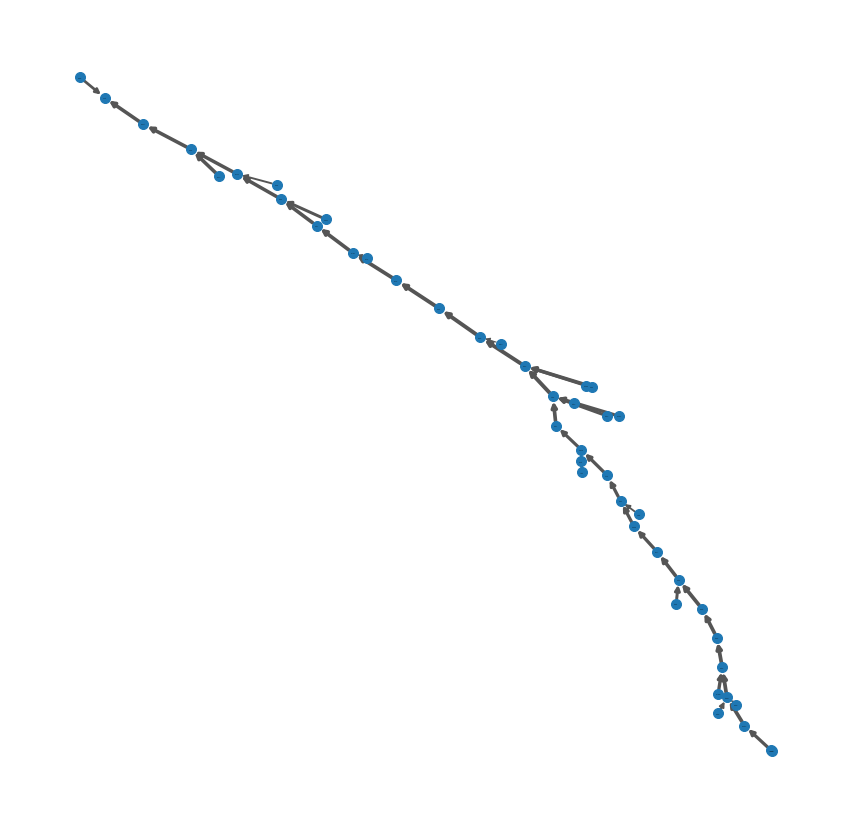

drawing whole graph


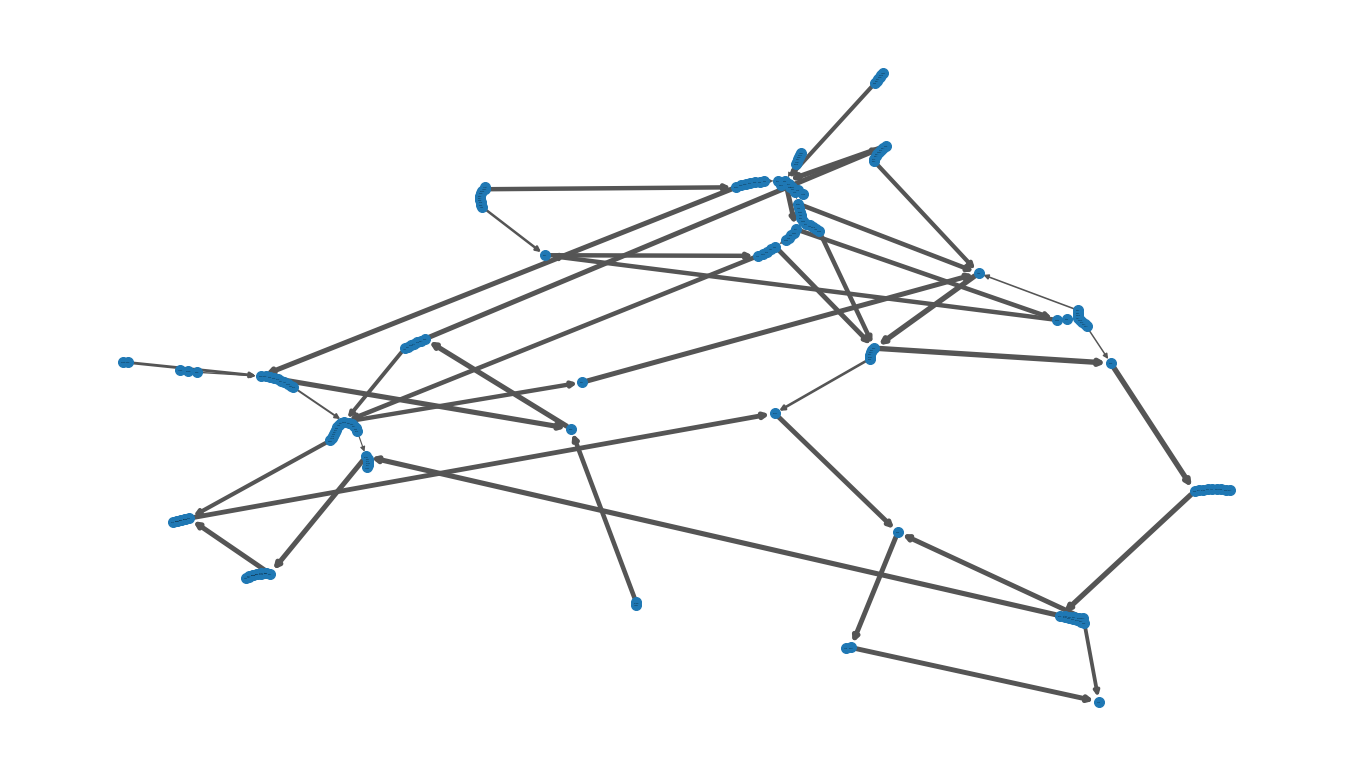

In [16]:
original = str2ncs('$Pham Son%')
# original = str2ncs('$Nam quoc son ha nam de cu, tuyet nhien dinh phan tai thien thu%')
print(original)
datas = errors_add(original, 0.04, 50)

# original = 'TTGAACGGCGGCTGTTAA'
# datas = ['TTGAACGGCGGCTGTTAA', 'TTGAACGGCGGCTGTTAA', 'TTGAACGGCGGCTGTTAA', 'TTGAACGGCGGCTGTTAA']
# datas = ['TTGAACGGCGGCTGTTAA', 'TTGAACGGCGACTGTTAA', 'TTGAACGGCGGCTGTTAA', 'TTGAACGGCGGCTGTTAA']
# datas = ['TTGAACGGCGGCTGTTAA', 'TTGAACGTGCGGCTGTTAA', 'TTGAACGGCGCTGTTAA', 'TTGAACGGCGGCTGTTAA']
# datas = ['AACGGCGGCTGT', 'AACGTGCGGCTGT', 'AACGGCGCTGT', 'AACGGCGGCTGT']


prune = 6
decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=6, visualization=False)
print('drawing pruned graph')
decoder.graph.draw_de_bruijn_graph(pruned=True, minimize_edge=True, weight_on=False, node_size=100, font_size=0, weight_scale=3)
print('drawing whole graph')
# decoder.graph.draw_de_bruijn_graph(minimize_edge=False, weight_on=True, node_size=2000, font_size=14, weight_scale=2, figsize=(24, 14))
decoder.graph.draw_de_bruijn_graph(minimize_edge=True, weight_on=False, node_size=100, font_size=0, weight_scale=1, figsize=(24, 14))


False
drawing pruned graph


/home/sownbanana/miniconda3/envs/ai4e/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/sownbanana/miniconda3/envs/ai4e/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


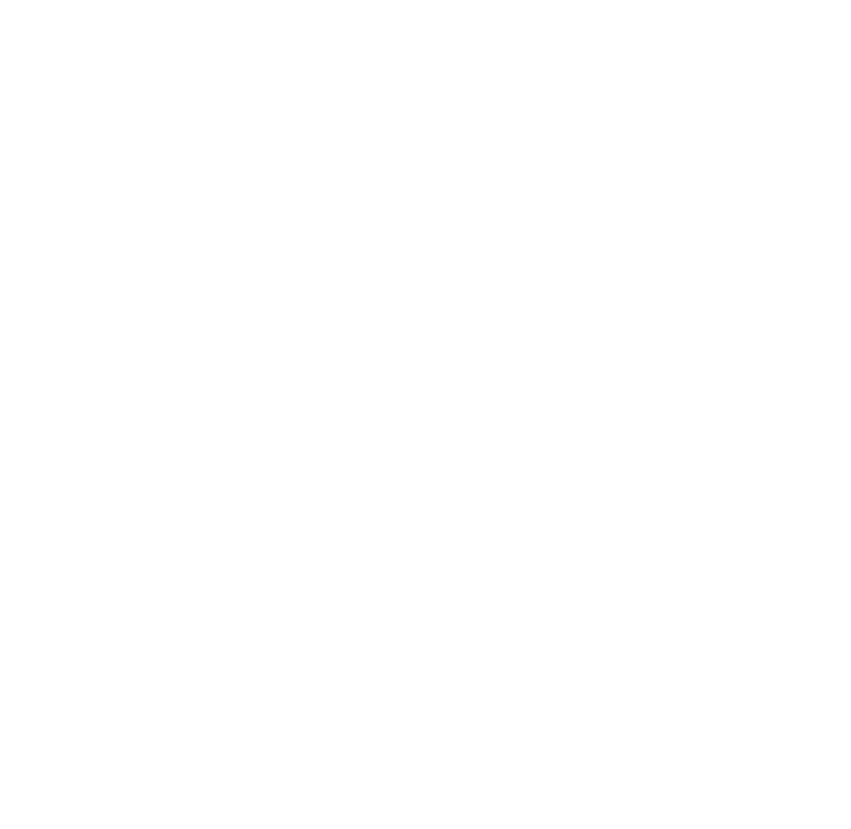

drawing whole graph


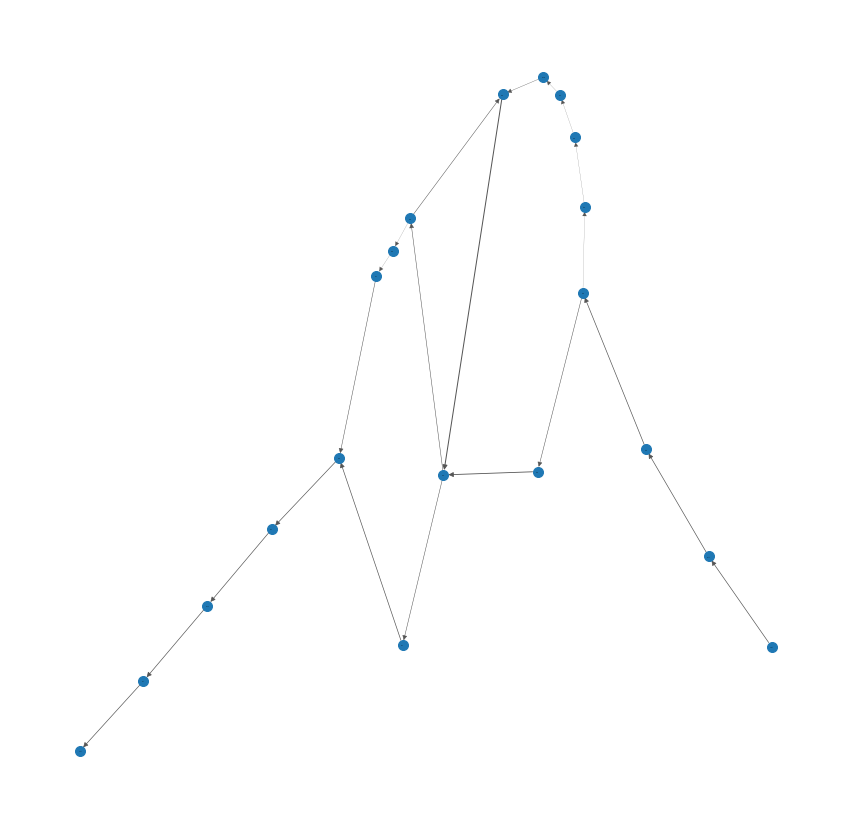

In [5]:
prune = 6
decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=4, visualization=False)
rs = decoder.decode(BFS(min_weight=prune, db=0))
print(rs[0])
print('drawing pruned graph')
decoder.graph.draw_de_bruijn_graph(pruned=True, minimize_edge=True, weight_on=False, node_size=100, font_size=0, weight_scale=3, figsize=(15, 15))
print('drawing whole graph')
decoder.graph.draw_de_bruijn_graph(minimize_edge=True, weight_on=False, node_size=100, font_size=0, weight_scale=0.5, figsize=(15, 15))

In [48]:
## BFS
# error 10% 100 copy kmer 24 prune > 1 bfs 0.006s total 0.13s
# error 1% 50 copy kmer 24 prune > 6 0.003s
# error 4% 50 copy kmer 24 prune > 6 bfs 0.004s total 0.12s

## Beam
# k 50 kmer 24 ~ 0.14s

# error 10% 50 copy kmer 24 prune > 1 BFS die, Beam 50 ok ~ 0.2s

# original = str2ncs('$Pham Hong Son%')
original = str2ncs('$Nam quoc son ha nam de cu, tuyet nhien dinh phan tai thien thu%')
print(original)
datas = errors_add(original, 0.04, 50)

prune = 6
decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=24, visualization=False)
# decoder.graph.draw_de_bruijn_graph(minimize_edge=True, weight_on=True)
# decoder.graph.draw_de_bruijn_graph(pruned=True, minimize_edge=True, weight_on=True)
rs = decoder.decode(BFS(min_weight=prune, db=0))
# rs = decoder.decode(Beam(k=50, db=100))

print(time.time() - start)
print(rs[0])

decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=24, visualization=False)
# decoder.graph.draw_de_bruijn_graph(minimize_edge=True, weight_on=True)
# decoder.graph.draw_de_bruijn_graph(pruned=True, minimize_edge=True, weight_on=True)
# rs = decoder.decode(BFS(min_weight=prune, db=100))
rs = decoder.decode(Beam(k=20, db=0))

print(time.time() - start)
print(rs[0])

prune = 1
decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=24, visualization=False)
rs = decoder.decode()

print(time.time() - start)
print(rs[0])

TTGCTCACTACAAGCTATGATTGTTCAAGCTGATGTCTCAGCCGTACTAGCCTCACTACAAGCTACCTAAGCTCAGATCCGAGCTAGGATGACCTATAGAGCCTCCGTCTGCTACTCAGCTACCTGCTCCGTAGCGAGCGTACTCTCAGCTAGACTCTGAGCTAGCGTCTGCTACTCAGCTAGCGTGATTAA
0.12570738792419434
True
0.08332300186157227
True
0.1287670135498047
True


In [99]:
original = str2ncs('$Pham Hong Son%')
original = str2ncs('$Nam quoc son ha nam de cu, tuyet nhien dinh phan tai thien thu%')
print(original)
datas = errors_add(original, 0.1, 100)

prune = 1
decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=24, visualization=False)
rs = decoder.decode(BFS(min_weight=prune, db=0))

print(time.time() - start)
print(rs[0])

decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=24, visualization=False)
rs = decoder.decode(Beam(k=20, db=0))

print(time.time() - start)
print(rs[0])

# prune = 6
decoder = Decoder(origin=original, prune=prune)
start = time.time()
decoder.build_graph(datas, len(original), kmer_size=24, visualization=False)
rs = decoder.decode(DFS(min_weight=prune))

print(time.time() - start)
print(rs[0])

TTGCTCACTACAAGCTATGATTGTTCAAGCTGATGTCTCAGCCGTACTAGCCTCACTACAAGCTACCTAAGCTCAGATCCGAGCTAGGATGACCTATAGAGCCTCCGTCTGCTACTCAGCTACCTGCTCCGTAGCGAGCGTACTCTCAGCTAGACTCTGAGCTAGCGTCTGCTACTCAGCTAGCGTGATTAA
0.2504725456237793
True
0.2089073657989502
True
0.18201708793640137
True


In [ ]:
decoder.graph.draw_de_bruijn_graph(minimize_edge=True, weight_on=True)
decoder.graph.draw_de_bruijn_graph(pruned=True, minimize_edge=True, weight_on=False)


In [ ]:
# TTGAACGGCGGCTGTTAA
# TTGAACGGCGACTGTTAA
# TTGAACGGCGACTGTTAA

In [ ]:
# datas = ['GAGCGATGTCTC', 'GAGTGATGTTC', 'GAGTGTTGTCTC']
# datas = ['GAGTGTTGTCTC']
# datas = ['TAATGCCATGGGATGTT']
# datas = ['AAAGGCGTTGAGGTT']
original = 'AACGGCGGCTGT'
datas = ['AACGGCGGCTGT', 'AACGGCGGCTGT', 'AACGGCGGCTGT', 'AACGGCGGCTGT']
datas = ['AACGGCGGCTGT', 'AACGGCGACTGT', 'AACGGCGGCTGT', 'AACGGCGGCTGT']
datas = ['AACGGCGGCTGT', 'AACGTGCGGCTGT', 'AACGGCGCTGT', 'AACGGCGGCTGT']

original = str2ncs('$Pham Son%')
print(original)
datas = errors_add(original, 0.1, 20)

graph = Graph(data = datas, data_length=len(original), kmer_size=15)
graph.build()
graph.draw_de_bruijn_graph(weight_on=False, minimize_edge=True, font_size=8)

graph

In [ ]:
datas

In [ ]:
graph.get_vertexes()

In [13]:
ncs = str2ncs('$Pham Son%')
print(ncs)
string = ncs2str('GAGTGATGTCTC')
print(string)

TTGGAGCGTACTACAAGCTGATGTCTCTAA
PSON


In [11]:
my_dict = {'foo': 'bar', 'spam': 'eggs'}
my_dict.update({'foo': 'new'})
my_dict

{'foo': 'new', 'spam': 'eggs'}

In [43]:
a = [1, 5.5, 7, 4, 9]
a.sort(reverse=True)
a

[9, 7, 5.5, 4, 1]

In [33]:
en = Encoder()

rs = en.get_parts(67, 10)
rs

['$will not be satisfied until "justice rolls down like waters, and %',
 '$e content of their character. I have a dream today! I have a drea%',
 '$merica of the fierce urgency of Now. This is no time to engage in%',
 '$umn of freedom and equality. Nineteen sixty-three is not an end, %',
 '$as a joyous daybreak to end the long night of their captivity. Bu%',
 '$g night of their captivity. But one hundred years later, the Negr%',
 '$ering with the heat of injustice, sweltering with the heat of opp%',
 '$l always march ahead. We cannot turn back. There are those who ar%',
 '$But we refuse to believe that the bank of justice is bankrupt. We%',
 '$ black men and white men, Jews and Gentiles, Protestants and Cath%']

In [29]:
len(rs), len(rs[0])

(10000, 67)

In [23]:
rs = np.array(rs)
rs.shape

(10,)

In [34]:
path = 'data'
np.save(f'{path}/origin.npy', rs)  
d = np.load(f'{path}/origin.npy')
rs == d

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [42]:
reads = []
for i, o in enumerate(rs):
    print(i, o, str2ncs(o))
    o = str2ncs(o)
    datas = errors_add(o, 0.04, 50)
    datas = np.array(datas)
    print(datas.shape)
    reads.append(datas)
reads = np.array(reads)
reads.shape


0 $will not be satisfied until "justice rolls down like waters, and % TTGATGCTGATCATCAGCCTCTGTTAGAGCCATCTAAGCTGAACTTAGCTGTGAGCTCTGCTATACAGCGATCTCTAGCTGATCAGCTTATGCGATTGATAGCTGTCACTAAGCCACTGTATCATCTGAAGCTACTGTATGCTCAGCATCCTGTCGCTAAGCATGACTTAGCTACACTGACCGAGCACTCTCTACAGCTAA
(50,)
1 $e content of their character. I have a dream today! I have a drea% TTGCTAAGCTCATGTCTCTAGCTACTCTAGAGCTGTGCTAGCTAGCGTCTACTGCACAGCTCACGTACTCACACTTCATAGCTACACACGAGCCTGAGCCGTACTGTACTAAGCACTAGCTACCACCTAACTACAAGCTAGTGTTACACTGACAATAGCCTGAGCCGTACTGTACTAAGCACTAGCTACCACCTAACTTAA
(50,)
2 $merica of the fierce urgency of Now. This is no time to engage in% TTGACACTACACCTGTCAACTAGCTGTGCTAGCTAGCGTCTAAGCGCTCTGCTACACTCACTAAGCGATCACGTCCTACTCTCAGACAGCTGTGCTAGCCTCTGTATGACGAGCTAGCGTCTGTGAAGCCTGTGAAGCCTCTGTAGCTAGCTGACACTAAGCTAGTGTAGCCTACTCGTCACTGTCCTAAGCCTGCTCTAA
(50,)
3 $umn of freedom and equality. Nineteen sixty-three is not an end, % TTGGATACACTCAGCTGTGCTAGCGCTCACCTACTATACTGTACAAGCACTCTCTACAGCCTATATGATACTATCCTGTAGGACACGAGCCTCCTG

(10, 50)

In [75]:
# 1k1050 10k450 1k0350 1k03100 1k01100
en = Encoder()
origins, reads = en.load_data(path='data/1k01100')
origins.shape, reads.shape

((1000,), (1000, 100))

In [80]:
prune = 4
kmer_size = 50
total_time = 0
bfs_results = []
print(f'kmer_size: {kmer_size} prune: {prune}')
for i, original in enumerate(origins):
    decoder = Decoder(origin=original, prune=prune)
    decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
    start = time.time()
    rs = decoder.decode(BFS(min_weight=prune, db=0))
    ttt = time.time() - start
    total_time += round(ttt, 3)
    bfs_results.append(rs[0])
    if i%10 == 0:
        print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(bfs_results).sum()*100/(i+1), 4)}%')

# i = 0
# original = str2ncs(origins[i])
# decoder = Decoder(origin=original, prune=prune)
# decoder.build_graph(reads[i], len(original), kmer_size=24, visualization=False)
# # decoder.graph.draw_de_bruijn_graph(pruned=True, minimize_edge=True, weight_on=True, node_size=2)
# # decoder.graph.draw_de_bruijn_graph(minimize_edge=True, weight_on=True, node_size=2)
# start = time.time()
# rs = decoder.decode(BFS(min_weight=prune, db=1000))
# print(time.time() - start)
# print(rs)

kmer_size: 50 prune: 4
0: 0.002s 0.002s 100.0%
10: 0.002s 0.031s 100.0%
20: 0.002s 0.057s 100.0%
30: 0.003s 0.083s 100.0%
40: 0.002s 0.105s 100.0%
50: 0.002s 0.127s 100.0%
60: 0.002s 0.15s 100.0%
70: 0.002s 0.178s 100.0%
80: 0.003s 0.205s 100.0%
90: 0.002s 0.234s 100.0%
100: 0.002s 0.257s 100.0%
110: 0.002s 0.282s 100.0%
120: 0.002s 0.304s 100.0%
130: 0.003s 0.33s 100.0%
140: 0.002s 0.354s 100.0%
150: 0.002s 0.379s 100.0%
160: 0.002s 0.401s 100.0%
170: 0.002s 0.424s 100.0%
180: 0.002s 0.451s 100.0%
190: 0.002s 0.477s 100.0%
200: 0.002s 0.5s 100.0%
210: 0.004s 0.524s 100.0%
220: 0.003s 0.547s 100.0%
230: 0.002s 0.573s 100.0%
240: 0.002s 0.6s 100.0%
250: 0.002s 0.631s 99.6016%
260: 0.002s 0.657s 99.6169%
270: 0.002s 0.68s 99.631%
280: 0.002s 0.704s 99.6441%
290: 0.003s 0.729s 99.6564%
300: 0.002s 0.76s 99.6678%
310: 0.002s 0.784s 99.6785%
320: 0.003s 0.812s 99.6885%
330: 0.002s 0.833s 99.6979%
340: 0.003s 0.855s 99.7067%
350: 0.003s 0.888s 99.7151%
360: 0.002s 0.91s 99.723%
370: 0.005s 0

In [82]:
prune = 6
k = 40
kmer_size=50
total_time = 0
beam_results = []
print(f'kmer_size: {kmer_size} k: {k}')
for i, original in enumerate(origins):
    decoder = Decoder(origin=original, prune=prune)
    decoder.build_graph(reads[i], len(original), kmer_size=kmer_size, visualization=False)
    start = time.time()
    rs = decoder.decode(Beam(k=k, db=0))
    ttt = time.time() - start
    total_time += round(ttt, 3)
    beam_results.append(rs[0])
    if i%10 == 0:
        print(f'{i}: {round(ttt, 3)}s {round(total_time, 3)}s {round(np.array(beam_results).sum()*100/(i+1), 4)}%')


kmer_size: 50 k: 40
0: 0.057s 0.057s 100.0%
10: 0.058s 0.618s 100.0%
20: 0.057s 1.18s 100.0%
30: 0.05s 1.727s 100.0%
40: 0.055s 2.294s 100.0%
50: 0.054s 2.912s 100.0%
60: 0.06s 3.499s 100.0%
70: 0.056s 4.079s 100.0%
80: 0.049s 4.618s 100.0%
90: 0.055s 5.232s 100.0%
100: 0.06s 5.821s 100.0%
110: 0.053s 6.36s 100.0%
120: 0.053s 6.902s 100.0%
130: 0.081s 7.536s 100.0%
140: 0.058s 8.138s 100.0%
150: 0.055s 8.688s 100.0%
160: 0.052s 9.225s 100.0%
170: 0.056s 9.793s 100.0%
180: 0.054s 10.357s 100.0%
190: 0.056s 10.889s 100.0%
200: 0.057s 11.431s 100.0%
210: 0.047s 11.976s 100.0%
220: 0.053s 12.521s 100.0%
230: 0.055s 13.055s 100.0%
240: 0.068s 13.622s 100.0%
250: 0.054s 14.176s 100.0%
260: 0.055s 14.729s 100.0%
270: 0.056s 15.301s 100.0%
280: 0.054s 15.862s 100.0%
290: 0.056s 16.415s 100.0%
300: 0.054s 16.932s 100.0%
310: 0.052s 17.475s 100.0%
320: 0.055s 18.018s 100.0%
330: 0.06s 18.589s 100.0%
340: 0.055s 19.178s 100.0%
350: 0.05s 19.711s 100.0%
360: 0.055s 20.263s 100.0%
370: 0.054s 20.81